In [47]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
data_path = "data/intern_task.csv"

In [49]:
df = pd.read_csv(data_path)
df.head(10)

,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
0,0,10,1.0,0.0,1.0,3.0,3.0,0.333333,0.0,0.333333,...,0.0,0.000000,0.454545,0.890238,8.655534,1.000000,0.077778,0.002222,1.0,0.333333
1,1,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.000000,0.773976,23.130514,0.000000,0.027826,0.000430,44.0,14.666667
2,0,10,3.0,0.0,2.0,0.0,3.0,1.000000,0.0,0.666667,...,0.0,0.000000,0.000000,0.918308,13.351339,0.000000,0.014925,0.000104,22.0,7.333333
3,1,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.000000,0.975355,18.240926,0.000000,0.053140,0.000255,8.0,2.666667
4,2,10,3.0,0.0,3.0,1.0,3.0,1.000000,0.0,1.000000,...,273.0,79.670665,0.200000,0.990119,31.786048,0.333333,0.046512,0.000307,24.0,8.000000
5,1,10,3.0,0.0,3.0,1.0,3.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.200000,0.974819,22.936731,0.333333,0.033233,0.000093,28.0,9.333333
6,1,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,3.0,16.200000,0.000000,0.945281,18.240926,0.000000,0.013008,0.000023,5.0,1.666667
7,0,10,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
8,0,10,2.0,0.0,1.0,0.0,2.0,0.666667,0.0,0.333333,...,218.0,55.069946,0.000000,0.448807,4.695805,0.000000,0.002153,0.000002,5.0,1.666667
9,0,10,3.0,0.0,0.0,0.0,3.0,1.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.975608,0.000000,0.000000,0.021583,0.000040,9.0,3.000000


In [46]:
df.isna().sum()
# df.isna().sum().sum()

rank           0
query_id       0
feature_0      0
feature_1      0
feature_2      0
              ..
feature_139    0
feature_140    0
feature_141    0
feature_142    0
feature_143    0
Length: 138, dtype: int64

Отлично, пропущенных значений нет.

## Visualization

1) Создам pdf с гистограммами распределения всех фичей
2) Посмотрим описания и корреляции фичей

### 1) Histograms

In [8]:
from matplotlib.backends.backend_pdf import PdfPages

pdf_path = "images/histograms.pdf"

with PdfPages(pdf_path) as pdf:
    features_per_page = 10

    total_features = [col for col in df.columns if "feature_" in col]
    total_pages = (len(total_features) + features_per_page - 1) // features_per_page

    for page in range(total_pages):
        fig, axes = plt.subplots(nrows=features_per_page, ncols=1, figsize=(10, 20))
        
        for i in range(features_per_page):
            feature_index = page * features_per_page + i
            if feature_index < len(total_features):
                ax = axes[i]
                feature = total_features[feature_index]
                ax.hist(df[feature], bins=30, color="skyblue", edgecolor="black")
                ax.set_title(f"Гистограмма {feature}")
                ax.set_xlabel("Значения")
                ax.set_ylabel("Частота")
            else:
                axes[i].axis("off")
        
        plt.tight_layout()
        pdf.savefig(fig)
        plt.close(fig)

### 2) Descriptions and Correlations

In [50]:
describe = df.describe()
correlation_matrix = df.corr()

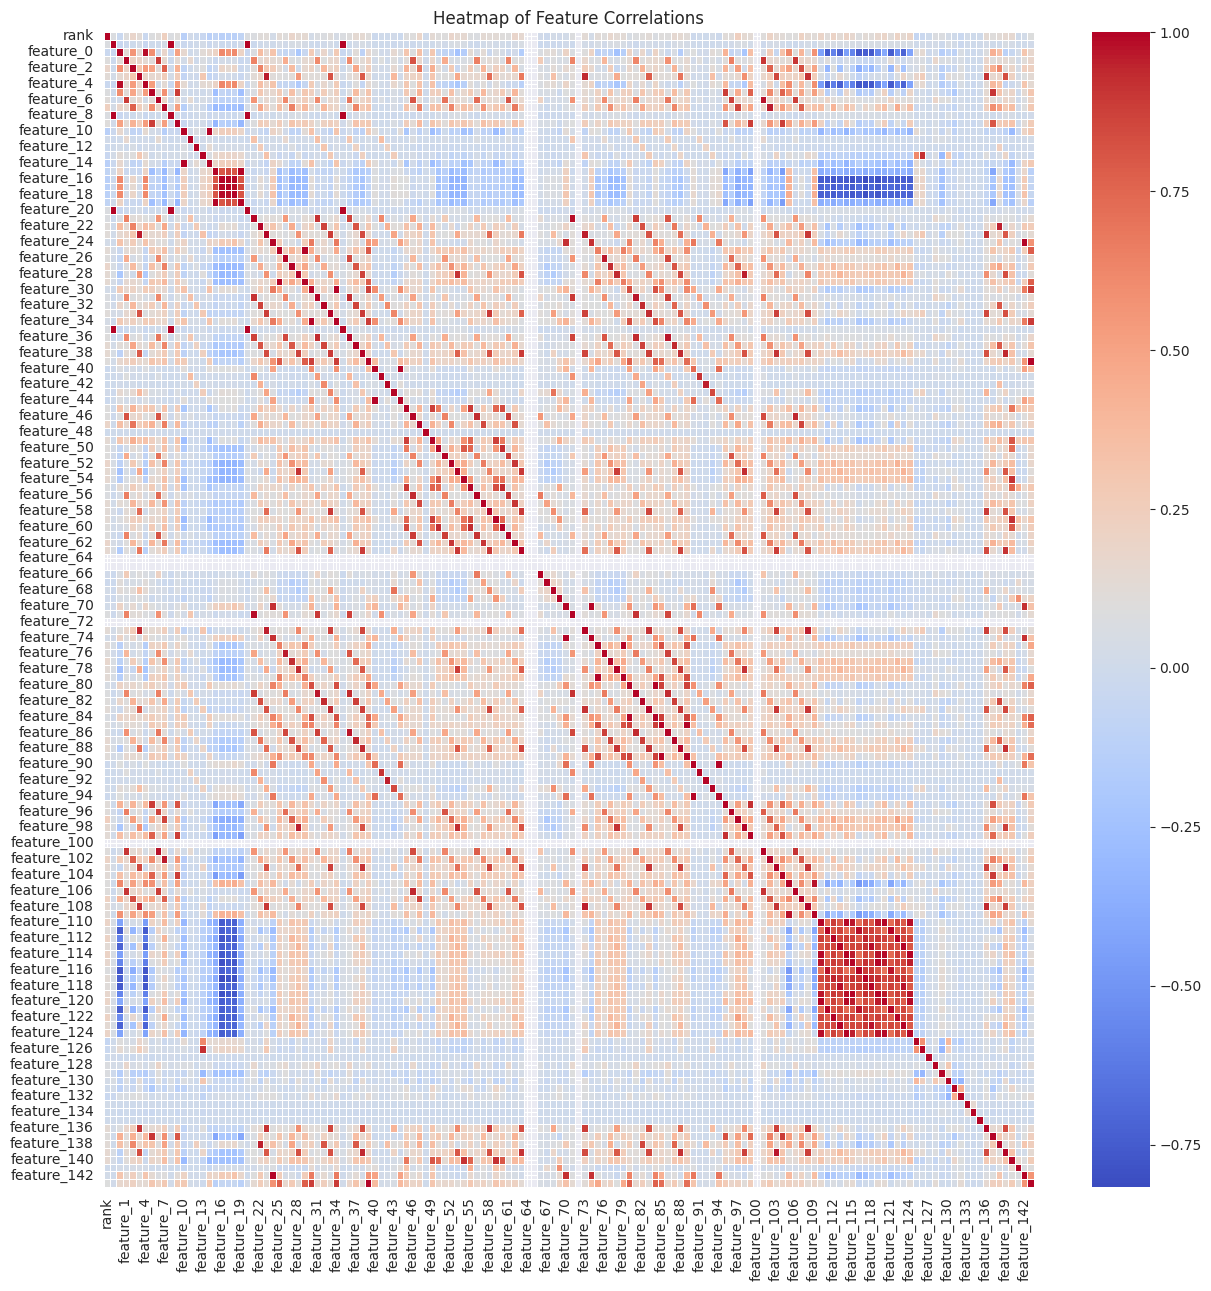

In [51]:
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".1f", linewidths=.5)
plt.title("Heatmap of Feature Correlations")
plt.show()

In [52]:
describe

,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
count,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,...,2.352580e+05,2.352580e+05,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000
mean,0.677869,14828.413401,1.911960,0.206233,1.189847,0.550272,1.960082,0.803964,0.097557,0.541174,...,4.763432e+02,1.046698e+04,0.070299,0.740710,11.067947,0.281747,0.027033,0.000269,22.457910,9.560379
std,0.830033,8193.945170,1.237374,0.579089,1.037233,0.790947,1.203534,0.339955,0.266035,0.419973,...,1.954840e+04,2.649584e+06,0.100721,0.352800,15.336861,0.392089,0.033351,0.002088,63.708018,14.347378
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8215.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.666667,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.620522,0.000000,0.000000,0.006703,0.000000,4.000000,2.000000
50%,0.000000,14935.000000,2.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.500000,...,0.000000e+00,0.000000e+00,0.000000,0.926779,9.448900,0.000000,0.017761,0.000008,12.000000,5.500000
75%,1.000000,21580.000000,3.000000,0.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,...,1.000000e+00,4.000000e-01,0.142857,0.999613,16.146733,0.500000,0.034954,0.000109,28.000000,12.000000
max,4.000000,29995.000000,31.000000,18.000000,27.000000,9.000000,31.000000,1.000000,1.000000,1.000000,...,1.731553e+06,8.000000e+08,0.818182,1.000000,2506.799764,1.000000,0.711261,0.250000,15074.000000,1552.000000


### Наблюдения:
1) Видно, что есть константы (например фича 100)
2) Можно заметить странное распределение в фиче 8. Думаю, ее просто сгенерировали от 0 до 1000.
3) Уж слишком нормальное распределение у фичи 48 :) Еще красивые распределения есть, например 59. 
4) Есть коллинеарные фичи.

Фичи которые соответствуют пунктам 1 и 2 можно сразу удалить.

## Data Cleaning

### 1) Removing Constant Columns

In [53]:
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
df.drop(columns=constant_columns, inplace=True)

print(constant_columns)

['feature_64', 'feature_65', 'feature_72', 'feature_100']


### 2) Removing: feature_8, feature_20, feature_35
Найдём подобные 8-й фиче колонки, и посмотрим их распределение

In [54]:
f_8_corr = correlation_matrix["feature_8"]
cols = f_8_corr[f_8_corr.abs() > 0.99].keys()
describe[cols]

,query_id,feature_8,feature_20,feature_35
count,235258.000000,235258.000000,235258.000000,2.352580e+05
mean,14828.413401,500.000000,0.500000,1.000000e+06
std,8193.945170,288.676975,0.288677,5.773540e+05
min,10.000000,0.000000,0.000000,0.000000e+00
25%,8215.000000,250.000000,0.250000,5.000000e+05
50%,14935.000000,500.000000,0.500000,1.000000e+06
75%,21580.000000,750.000000,0.750000,1.500000e+06
max,29995.000000,1000.000000,1.000000,2.000000e+06


Видно и в histograms.pdf, и по корреляции с query_id, что фичи 8, 20 и 35 - это просто сгенерированные значения.
Удаляем их.

In [55]:
df.drop(columns=["feature_8", "feature_20", "feature_35"], inplace=True)

### 3) Feature 48

In [56]:
# todo: explain why we remove this feature

# df.drop(columns=["feature_48"], inplace=True)
# describe["feature_48"]

### 4) Collinear Features

In [58]:
describe = df.describe()
correlation_matrix = df.corr()

In [59]:
# Идентификация пар признаков с корреляцией выше 0.95
high_corr_pairs = correlation_matrix.stack().reset_index()
high_corr_pairs.columns = ["Feature1", "Feature2", "Correlation"]
high_corr_pairs = high_corr_pairs[(high_corr_pairs["Feature1"] != high_corr_pairs["Feature2"]) & 
                                  (abs(high_corr_pairs["Correlation"]) > 0.98)]

# Удаление дубликатов (пары A-B и B-A)
high_corr_pairs = high_corr_pairs.loc[high_corr_pairs["Feature1"] < high_corr_pairs["Feature2"]]

high_corr_pairs

,Feature1,Feature2,Correlation
1544,feature_10,feature_14,0.997014
2244,feature_15,feature_19,0.999892
2381,feature_16,feature_17,0.991783
2382,feature_16,feature_18,0.989091
2521,feature_17,feature_18,0.985465
2987,feature_21,feature_71,0.982731
3504,feature_25,feature_29,0.996002
4204,feature_30,feature_34,0.997357
5464,feature_40,feature_44,0.997458
9383,feature_70,feature_74,0.999599


In [70]:
feature_15_and_19 = df[["feature_15", "feature_19"]]
feature_15_and_19.value_counts()

feature_15  feature_19
 18.420681   18.420681    4728
 1.632588    1.630841      908
-4.387408   -4.412168      773
 0.472511    0.471962      703
 19.654407   19.652424     622
                          ... 
 51.892180   51.887015       3
 40.799766   40.798891       2
 10.953864   10.952721       2
 16.473408   16.459180       1
 13.581464   13.576781       1
Name: count, Length: 1906, dtype: int64

## Cut df

In [110]:
# query_id_values_df = df["query_id"].value_counts()
# cut_df_query_ids = query_id_values_df[query_id_values_df.values <= 20].keys().values
# cut_df = df[df["query_id"].isin(cut_df_query_ids)]
# cut_df.head(10)

In [74]:
unique_counts = df.nunique().sort_values()
low_var_features = unique_counts[unique_counts < 1000]

low_var_features

feature_96       2
feature_98       2
feature_97       2
feature_99       2
feature_95       2
rank             5
feature_3       10
feature_1       10
feature_28      10
feature_33      11
feature_23      13
feature_2       15
feature_0       16
feature_4       16
feature_125     19
feature_27      24
feature_6       25
feature_26      26
feature_139     29
feature_7       32
feature_31      35
feature_9       44
feature_5       44
feature_38      53
feature_21      54
feature_43      59
feature_13      60
feature_32      60
feature_22      73
feature_53      77
feature_58     111
feature_128    120
feature_36     125
feature_37     153
feature_11     156
feature_136    162
feature_25     215
feature_29     216
feature_41     226
feature_132    253
feature_131    254
feature_12     281
feature_42     290
feature_126    290
feature_51     298
feature_63     313
feature_52     360
feature_34     386
feature_30     387
feature_56     435
feature_68     459
feature_142    529
feature_24  

## Feature Engineering

In [39]:
describe = df.describe()
correlation_matrix = df.corr()

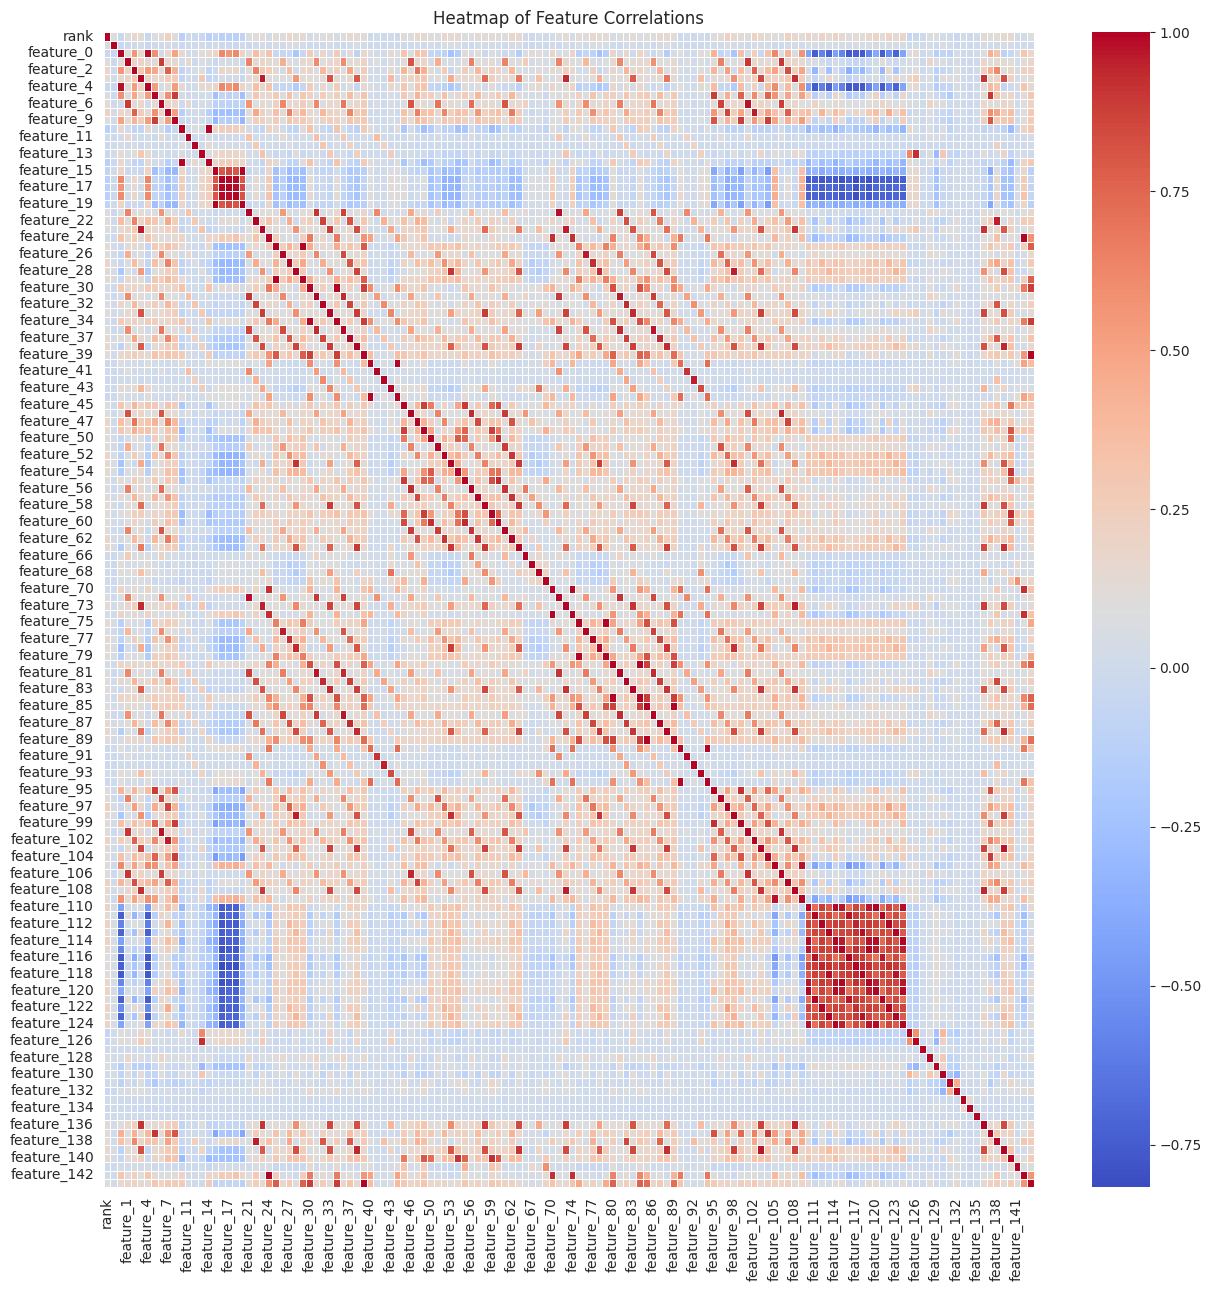

In [40]:
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".1f", linewidths=.5)
plt.title("Heatmap of Feature Correlations")
plt.show()

In [41]:
describe

,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
count,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,...,2.352580e+05,2.352580e+05,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000,235258.000000
mean,0.677869,14828.413401,1.911960,0.206233,1.189847,0.550272,1.960082,0.803964,0.097557,0.541174,...,4.763432e+02,1.046698e+04,0.070299,0.740710,11.067947,0.281747,0.027033,0.000269,22.457910,9.560379
std,0.830033,8193.945170,1.237374,0.579089,1.037233,0.790947,1.203534,0.339955,0.266035,0.419973,...,1.954840e+04,2.649584e+06,0.100721,0.352800,15.336861,0.392089,0.033351,0.002088,63.708018,14.347378
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8215.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.666667,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.620522,0.000000,0.000000,0.006703,0.000000,4.000000,2.000000
50%,0.000000,14935.000000,2.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.500000,...,0.000000e+00,0.000000e+00,0.000000,0.926779,9.448900,0.000000,0.017761,0.000008,12.000000,5.500000
75%,1.000000,21580.000000,3.000000,0.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,...,1.000000e+00,4.000000e-01,0.142857,0.999613,16.146733,0.500000,0.034954,0.000109,28.000000,12.000000
max,4.000000,29995.000000,31.000000,18.000000,27.000000,9.000000,31.000000,1.000000,1.000000,1.000000,...,1.731553e+06,8.000000e+08,0.818182,1.000000,2506.799764,1.000000,0.711261,0.250000,15074.000000,1552.000000


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235258 entries, 0 to 235257
Columns: 139 entries, rank to feature_143
dtypes: float64(137), int64(2)
memory usage: 249.5 MB


## PCA

In [115]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [116]:
features_for_pca = df.drop(columns=["rank", "query_id"])

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_for_pca)

In [117]:
pca = PCA()
features_pca = pca.fit_transform(features_scaled)

In [118]:
# Объясненная дисперсия каждой компоненты
explained_variance = pca.explained_variance_ratio_

# Суммарная объясненная дисперсия для кумулятивной суммы
cumulative_variance = np.cumsum(explained_variance)

explained_variance, cumulative_variance

(array([1.82846541e-01, 1.30222040e-01, 7.97723484e-02, 7.78558552e-02,
        6.04854373e-02, 3.92797709e-02, 3.54633847e-02, 3.05471864e-02,
        2.55574104e-02, 2.54503863e-02, 2.35858040e-02, 2.03114810e-02,
        1.83770063e-02, 1.43671966e-02, 1.35932587e-02, 1.32775464e-02,
        1.19966425e-02, 1.12994664e-02, 1.08598409e-02, 9.34042129e-03,
        8.35774476e-03, 8.00490145e-03, 7.68808571e-03, 7.34548681e-03,
        7.31022244e-03, 7.28736244e-03, 6.85911256e-03, 6.81557942e-03,
        6.26847486e-03, 6.19810332e-03, 6.12947592e-03, 5.72775902e-03,
        5.62684427e-03, 5.21034180e-03, 4.82624109e-03, 4.54359338e-03,
        4.07338466e-03, 3.96676455e-03, 3.90631866e-03, 3.39368307e-03,
        3.33093813e-03, 3.02494653e-03, 2.92340758e-03, 2.88518718e-03,
        2.62081354e-03, 2.39665731e-03, 2.10920005e-03, 1.96733576e-03,
        1.91596253e-03, 1.66494290e-03, 1.59878596e-03, 1.40651094e-03,
        1.31345589e-03, 1.21390739e-03, 1.16694316e-03, 1.062938

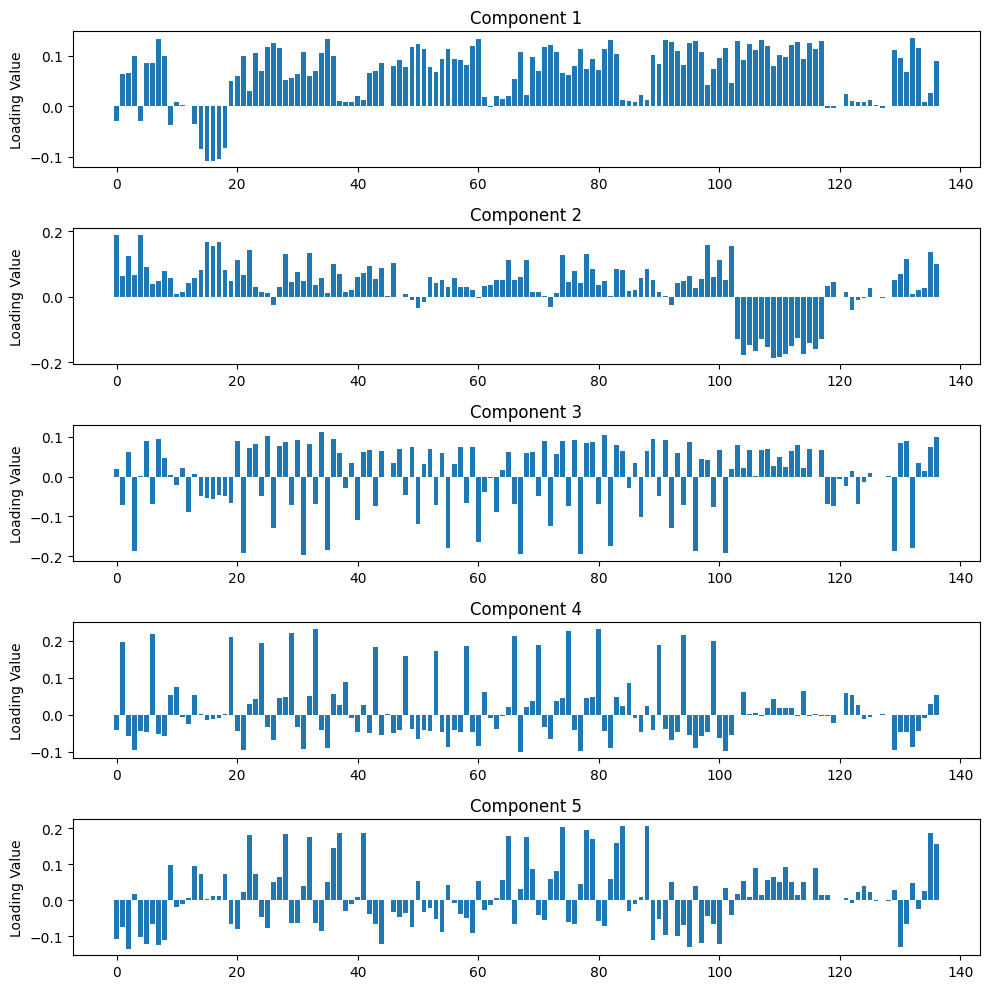

In [119]:
num_components = 5
loadings = pca.components_[:num_components]

fig, axes = plt.subplots(nrows=num_components, figsize=(10, num_components * 2), dpi=100)

for i, ax in enumerate(axes):
    components_loadings = loadings[i]
    ax.bar(range(len(components_loadings)), components_loadings)
    ax.set_title(f"Component {i+1}")
    ax.set_ylabel("Loading Value")

plt.tight_layout()
plt.show()

In [120]:
# Количество компонент, которое ты решил использовать
n_components = 20

# Создание нового DataFrame с первыми n_components главными компонентами
new_features = pd.DataFrame(features_pca[:, :n_components], columns=[f"PC{i+1}" for i in range(n_components)])

# Проверка первых нескольких строк нового DataFrame
new_features.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,4.031624,1.933464,-8.964168,-5.980812,1.131865,3.635235,-0.087606,-0.471831,-0.512552,0.932306,0.481509,1.257980,-0.087328,-0.493672,-1.327264,-1.346950,1.446229,0.465192,0.712098,-0.956940
1,-0.043029,2.366047,3.811929,-1.038765,-2.034367,-0.323580,0.517958,0.645321,0.323084,-0.192914,-0.651337,-0.200235,2.389113,0.443049,-0.344942,-0.645254,0.093837,-1.094152,0.500341,0.327576
2,-2.477877,1.287113,2.141071,-0.579505,-1.604713,-0.724317,-0.549902,1.216274,0.206812,0.135684,0.293448,0.523582,0.410139,0.528211,0.016056,-0.883072,0.541253,0.257560,0.743918,-0.160572
3,-0.058892,1.279461,3.690945,-1.686791,-3.815199,1.505603,-0.924479,0.230705,1.324154,-0.379574,0.182308,-0.532886,0.432667,-0.293796,-0.111674,-0.052568,-0.077857,-0.648236,-0.016126,0.913939
4,3.014263,3.068484,0.351022,-3.721790,-2.622191,1.419503,1.766019,1.851164,-0.981608,0.593432,0.050056,-1.832197,-1.019592,-1.984843,0.336456,0.303509,-0.596985,-0.526605,-0.669424,0.621680


In [121]:
new_features.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
count,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05,2.352580e+05
mean,3.633989e-16,-2.628843e-16,1.198443e-16,-2.416216e-17,-1.957135e-17,-5.219027e-17,4.252540e-17,3.382703e-18,8.601730e-17,2.996108e-17,-5.219027e-17,1.063135e-17,-2.295405e-17,4.494162e-17,1.498054e-17,-3.624324e-18,-3.237730e-17,-2.416216e-18,-5.859324e-17,-2.295405e-17
std,5.005006e+00,4.223801e+00,3.305882e+00,3.265930e+00,2.878635e+00,2.319774e+00,2.204202e+00,2.045723e+00,1.871198e+00,1.867275e+00,1.797573e+00,1.668138e+00,1.586714e+00,1.402966e+00,1.364655e+00,1.348715e+00,1.282009e+00,1.244200e+00,1.219756e+00,1.131213e+00
min,-4.425804e+01,-8.580035e+00,-8.254244e+01,-4.420070e+01,-6.660652e+01,-4.235262e+01,-2.139295e+01,-1.263097e+02,-7.289464e+01,-7.608610e+01,-1.090200e+02,-5.604394e+01,-3.854774e+01,-1.039033e+02,-1.167781e+02,-7.484916e+01,-8.962142e+01,-4.306846e+01,-9.565032e+01,-1.025258e+02
25%,-3.573511e+00,-2.656768e+00,-2.086361e+00,-1.852030e+00,-1.580021e+00,-1.297601e+00,-1.035003e+00,-7.839544e-01,-7.107851e-01,-4.993837e-01,-8.983356e-01,-9.300407e-01,-1.018218e+00,-5.855355e-01,-5.923857e-01,-5.674287e-01,-5.331293e-01,-7.146347e-01,-5.490683e-01,-3.193864e-01
50%,-4.176351e-01,-2.966770e-01,-3.286615e-02,-2.757418e-01,-1.735059e-01,-2.453656e-01,-5.040221e-02,2.413262e-01,9.427898e-02,1.617998e-01,1.540447e-01,1.657235e-02,-8.331466e-02,1.064920e-02,4.426949e-02,-3.012489e-03,7.100851e-02,-6.088828e-02,-3.048326e-03,6.207975e-02
75%,2.875553e+00,2.247294e+00,2.150620e+00,1.188478e+00,1.446454e+00,1.005526e+00,9.618248e-01,1.119902e+00,9.184329e-01,6.721588e-01,1.008111e+00,1.008188e+00,9.217348e-01,5.933863e-01,6.117356e-01,5.456662e-01,6.031564e-01,6.417878e-01,5.564414e-01,4.266967e-01
max,9.060886e+01,3.389715e+02,1.516803e+02,2.379312e+02,3.763537e+02,6.831172e+01,3.223861e+02,1.336828e+02,2.577186e+02,3.871382e+02,1.584792e+02,1.837006e+02,8.419617e+01,1.476931e+02,1.543301e+02,1.298908e+02,9.506629e+01,7.885281e+01,1.234803e+02,1.302354e+02
